In [43]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
df =  pd.read_excel('../data/bank_dummiesonly.xlsx')

KeyboardInterrupt: 

In [ ]:
df.columns

Index(['job_admin.', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [ ]:
columns_to_delete = ['job_unknown', 'education_unknown', 'default_no', 'housing_no', 'loan_no', 'contact_unknown', 'poutcome_unknown', 'y_no', 'marital_divorced']
df.drop(columns=columns_to_delete, inplace=True)

In [ ]:
df.columns

Index(['job_admin.', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'y_yes',
       'marital_married', 'marital_single'],
      dtype='object')

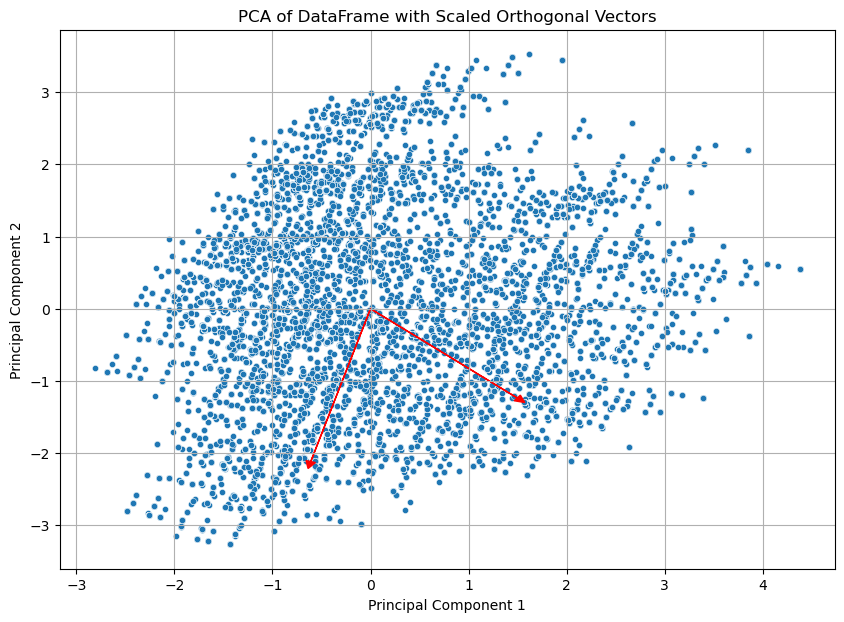

In [39]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))

sns.scatterplot(x='PC1', y='PC2', data=principal_df, s=20)

origin = [0, 0]  
scale = 7 

eigenvectors = pca.components_.T

for i in range(eigenvectors.shape[1]):
    plt.arrow(origin[0], origin[1], eigenvectors[0, i] * scale, eigenvectors[1, i] * scale, 
              head_width=0.1, head_length=0.1, fc='r', ec='r')

plt.title('PCA of DataFrame with Scaled Orthogonal Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

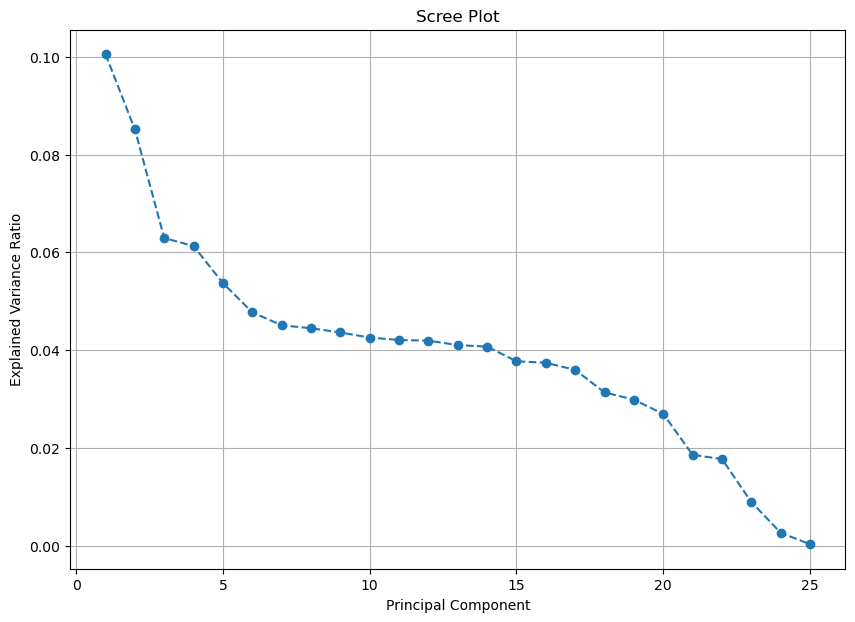

In [36]:
pca_full = PCA()
pca_full.fit(standardized_data)

explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [40]:
pca = PCA(n_components=3)
pca.fit(standardized_data)

loadings = pca.components_.T

loadings_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2', 'PC3'], index=df.columns)

print("Principal Component Loadings:")
print(loadings_df)

principal_components = pca.transform(standardized_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

print("\nPrincipal Component Scores:")
print(principal_df)

Principal Component Loadings:
                          PC1       PC2       PC3
job_admin.          -0.086385  0.216750 -0.093287
job_blue_collar     -0.302459 -0.177279  0.245860
job_entrepreneur     0.016235 -0.065726 -0.128776
job_housemaid       -0.042805 -0.124234  0.136963
job_management       0.444219 -0.193581 -0.138409
job_retired         -0.039310 -0.132072  0.138837
job_self_employed    0.060205 -0.027801 -0.030651
job_services        -0.125933  0.145840 -0.081739
job_student          0.083583  0.161174  0.277124
job_technician      -0.005842  0.222717 -0.194257
job_unemployed      -0.003411  0.009267  0.093335
education_primary   -0.182442 -0.378252  0.386660
education_secondary -0.360009  0.436585 -0.181521
education_tertiary   0.537115 -0.172768 -0.132466
default_yes         -0.017548  0.009114 -0.008805
housing_yes         -0.166582  0.041325 -0.150516
loan_yes            -0.078131  0.010710 -0.194637
contact_cellular     0.208751  0.105987 -0.226386
contact_telephone   

### K-Means Clustering

c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

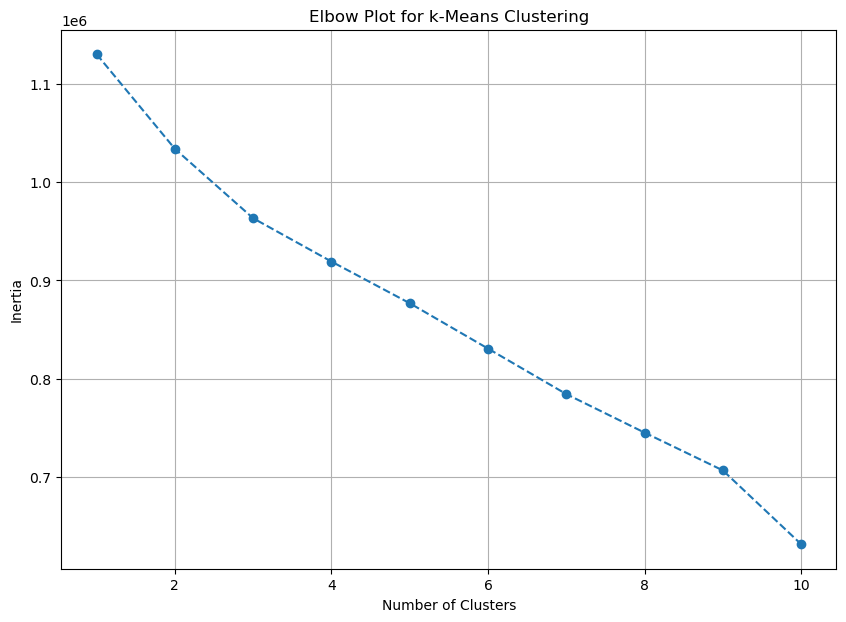

In [42]:


# Determine the range for the number of clusters
range_n_clusters = range(1, 11)

# List to store the inertia for each number of clusters
inertia = []

# Perform k-means clustering for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(standardized_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for k-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
